As a background motivation to the project problem, consider that the annual cost of domestic flight delays to the US economy was estimated to be $31-40 billion in 2007 (Joint Economic Committee, US Senate 2008). Correctly predicting flight delays allows passengers to be prepared for the disruption of the journey and airlines to proactively respond to the potential causes of the flight delay to mitigate the impact.

We at UPX have tried to coreelate the above problem by doing some EDA on the flight data and answering some buisness questions,This dataset contains information about all flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013: 336,776 flights in total.

In [1]:
#your_local_path="C:/Users/edfhlll/Documents/Python/Project_1_NYC-Flight data/"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
import datetime
from pylab import *
from scipy import *
from pylab import rcParams

Lets consider the observed probability of delay in minutes on the entire dataset,looking at departure and arrival delays separately.

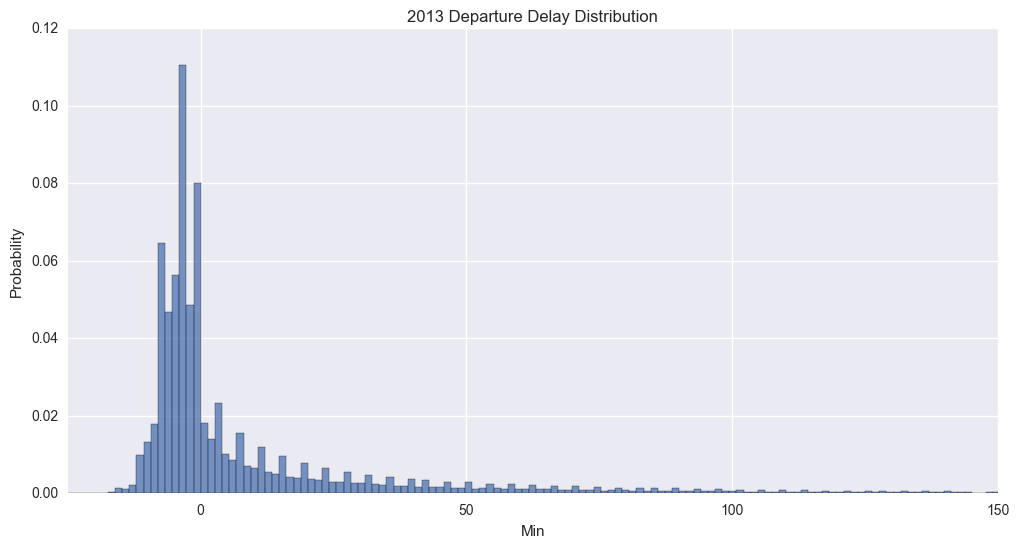

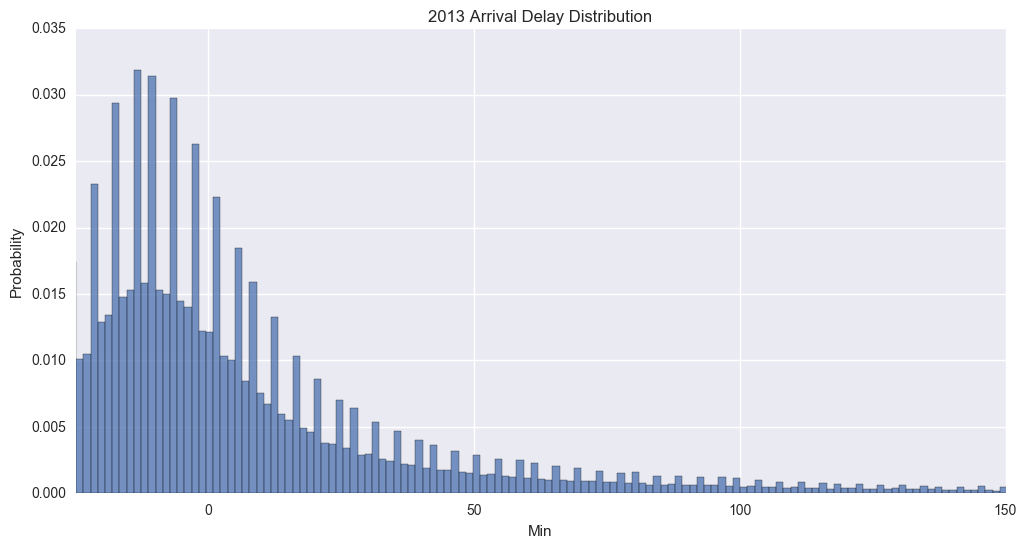

In [11]:
# plt Departure delay distribution
plt.figure(figsize=(12, 6))
plt.hist(data.dep_delay.dropna(),bins = 1000,normed=1, alpha=0.75)
plt.xlim(-25,150)
plt.xlabel('Min')
plt.ylabel('Probability')
plt.title('2013 Departure Delay Distribution')

# plt arrival delay distribution
plt.figure(figsize=(12, 6))
plt.hist(data.arr_delay.dropna(),bins = 1000,normed=1, alpha=0.75)
plt.xlim(-25,150)
plt.xlabel('Min')
plt.ylabel('Probability')
plt.title('2013 Arrival Delay Distribution')

We notice a much higher probability of short delays - actually negative, so advances - for departure delays and a wider distrbution (in minutes) for arrivals. Notice the long right-hand tails. Some flights are delayed for very long times, over two hours. On the other hand, the delays are centered around just below zero. In both cases, the mode of the distribution is less than zero, meaning most of the flights leave from gate and arrive at gate even before the published schedule time of departure and arrival.
The x-axis for the two plots are to scale. As a result, we can see that the arrival delay distribution, compared with the deparutre delay distrubiton, leans toward left. A flight delay is defined by the schedule time of an event compared against the actual time of the event.

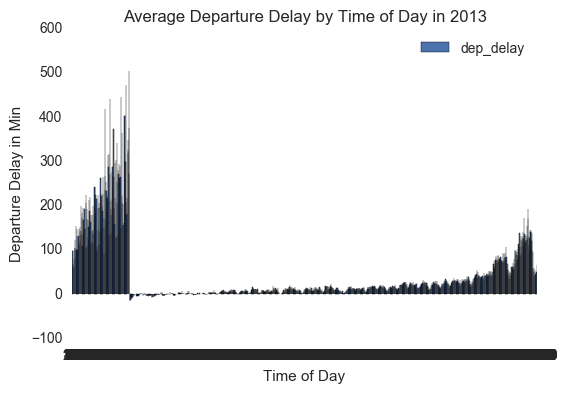

In [ ]:
# Lets examine the correlation between departure delay and arrival delay by time of day"
plt.figure(figsize=(12,6))   
data[['dep_time','dep_delay']].dropna().groupby('dep_time').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Time of Day')
plt.ylabel('Departure Delay in Min')
plt.title('Average Departure Delay by Time of Day in 2013')


data[['arr_time','arr_delay']].dropna().groupby('arr_time').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Time of Day')
plt.ylabel('Arrival Delay in Min')
plt.title('Average Arrival Delay by Time of Day in 2013')

In [ ]:
Clearly it could be inferred that arrival delay is having strong corellation with time of the day compared to arrival delay. 

# How does the departure delays varies over the course and month of the day?

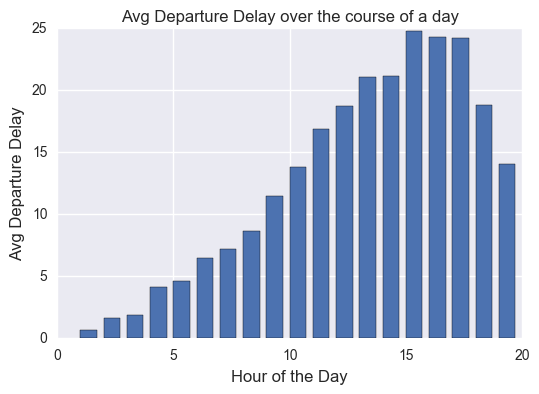

Number of flights by hour of the day:
 1         1
5      1953
6     25951
7     22821
8     27242
9     20312
10    16708
11    16033
12    18181
13    19956
14    21706
15    23888
16    23002
17    24426
18    21783
19    21441
20    16739
21    10933
22     2639
23     1061
Name: count, dtype: int64


In [4]:
# Exploring data for departure delay trends over the course of a day
flight_data = pd.read_csv('flight_data.csv')
dep_delay_hour = pd.DataFrame(flight_data.groupby('hour')['dep_delay'].mean()) # Group by hour
dep_delay_hour.index.name = None

# Plotting Data
fig, ax = plt.subplots()
plt.bar(range(20), dep_delay_hour.dep_delay, 0.70)
plt.xlabel('Hour of the Day', size = 12)
plt.ylabel('Avg Departure Delay', size = 12)
plt.title('Avg Departure Delay over the course of a day')
plt.show()

#Calculating the number of flights by hour of the day
count_flights_hour = flight_data.groupby('hour').count()
count_flights_hour.columns.values[0]='count'
count_flights_hour.index.name = None
print ('Number of flights by hour of the day:\n', count_flights_hour['count'])

From the plot it is clear that the delays are more prominent during the night mainly between 10 PM and 4 AM (with a peak in the 3rd hour of the day). A possible reason for this could be low visibility condition during these hours or other factors like fog or bad weather conditions. The delay in flight departures go down significantly in other hours of the day. Also, another point to note is that the number of flights in these late hours are fewer than others -- this is one possible reason why the average of the departure delay times is higher during 10 PM - 4 AM (fewer flights and most flights delayed: Example: Only 11 flights around 3 AM).'''

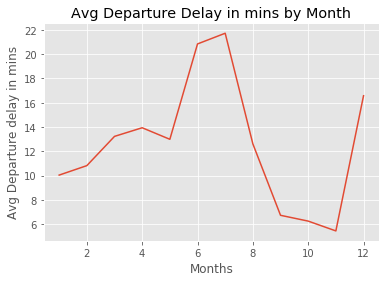

In [7]:
# Exploring the seasonal patterns in average departure delay in mins by Month

#flight_data.head()
matplotlib.style.use('ggplot')
plt.plot(flight_data.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins', size = 12)
plt.title('Avg Departure Delay in mins by Month')
plt.show()

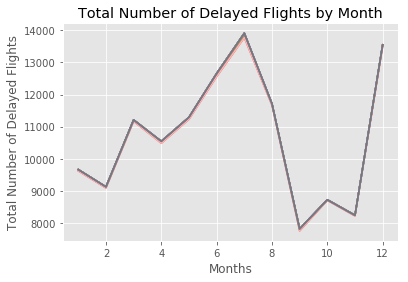

In [9]:
#Exploring the seasonal patterns in total number of delayed by Month
dep_delay = flight_data[flight_data['dep_delay'] > 0]
plt.plot(dep_delay.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()


There seem to be some evident patterns in the flight departure delays. Mostly, the holiday season shows spike in the mean flight departure delay time during the months of June, July and December. These months have the highest average of delayed mins. Also, the second graph shows the total number of flights delayed in a given month and again July and December seem to stand out with most number of delayed flights in total. This ties back directly to the Summer and winter break in the US.

Since Month visulization summarize most of the data lets look at to find more hidden information that we can infer 

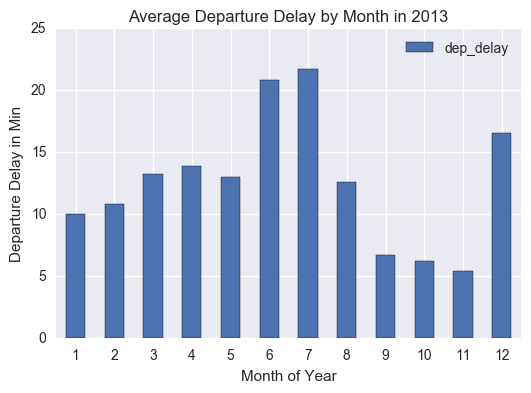

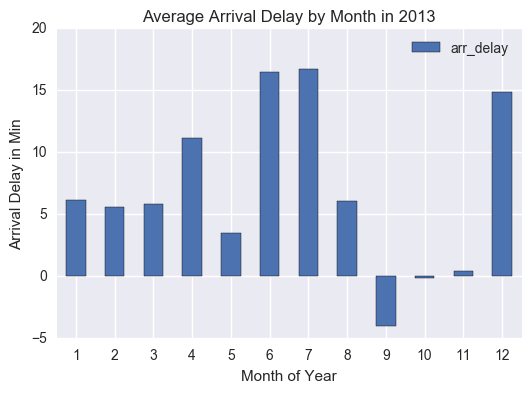

In [12]:
# Look at Month of Year Delay Impact
plt.figure(figsize=(12, 6))
data[['month','dep_delay']].groupby('month').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month of Year')
plt.ylabel('Departure Delay in Min')
plt.title('Average Departure Delay by Month in 2013')

data[['month','arr_delay']].groupby('month').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month of Year')
plt.ylabel('Arrival Delay in Min')
plt.title('Average Arrival Delay by Month in 2013')

For both departures and arrivals, the impact of June & July is clear they are marked by higher delays - the highest delays are in that month. On the other hand, September, October and November are the months with the least amount of delay. Also,December posts high delay values as well. The reason for winter's high delay values is probably because of snowstorms in US. Also, in summer, thunderstorms in some part of US can cause high delay impact to the rest of country. A snowstorm/storm may only affect operations at an airport or two. However, delay propagation, which marks as the major contributor for flight delay, can cause ripple effects on delay to downstream flight operations.
We also think that the time of day should have an impact. Normally, flight delays cumulate throughout the day through a knock-on effect, where delayed flights provoke other delays because of tight schedules and runway congestion. We plot the mean delay by hour of day in a column chart.

# What was the worst day to travel out from NYC in 2013?

In [21]:
nyc=pd.read_csv(your_local_path+'flight_data.csv')
nyc1=nyc[nyc.dep_delay>0]
nyc_worst=nyc1.groupby(["month","day"]).mean()
print (nyc_worst[nyc_worst.dep_delay==max(nyc_worst.dep_delay)])

             year     dep_time  sched_dep_time   dep_delay     arr_time  \
month day                                                                 
3     8    2013.0  1502.488515      1409.69219  102.903522  1541.917305   

           sched_arr_time   arr_delay       flight    air_time     distance  \
month day                                                                     
3     8       1596.817764  101.607963  1687.222052  150.228178  1081.352221   

                hour    minute  
month day                       
3     8    13.833078  26.38438  


# Which was the best and worst airlines in 2013?

C:\Users\edfhlll\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


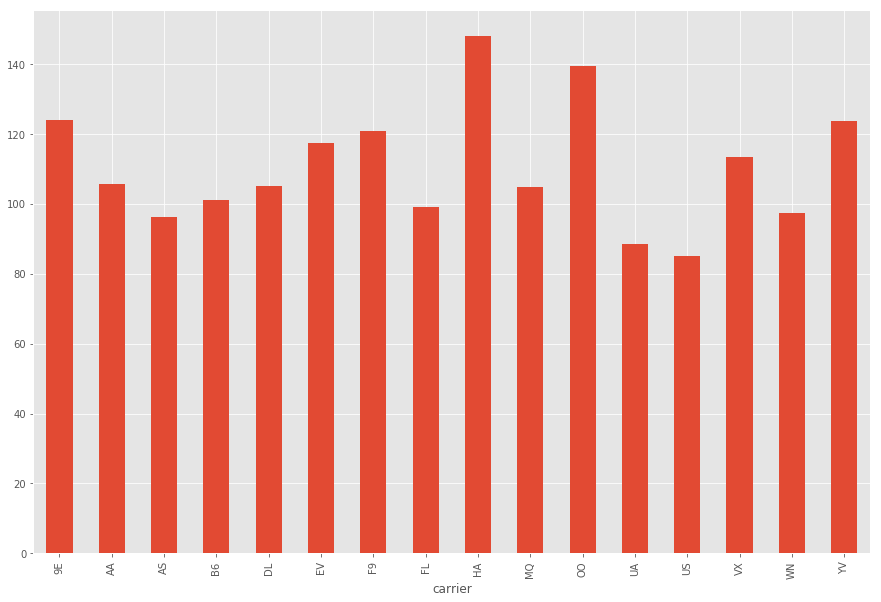

In [22]:
newframe=nyc[(nyc.dep_delay>0) & (nyc.arr_delay>0)]
newframe["total_delay"]=nyc["dep_delay"]+nyc["arr_delay"]
worstairline=newframe.groupby("carrier").total_delay.mean()
worstairline.plot.bar(figsize=(15,10))

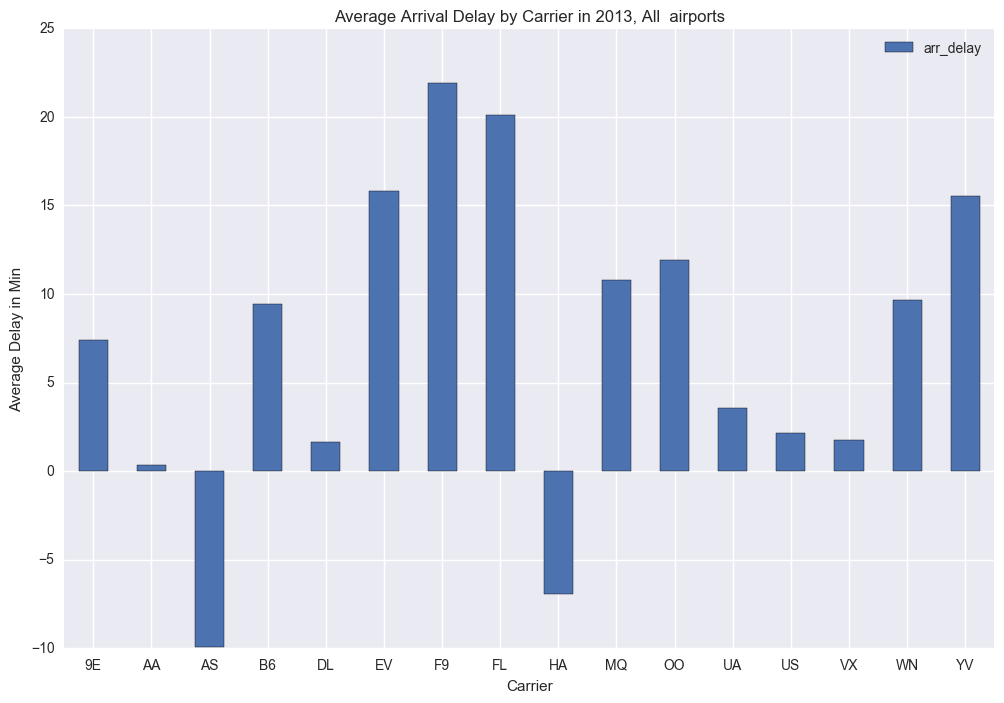

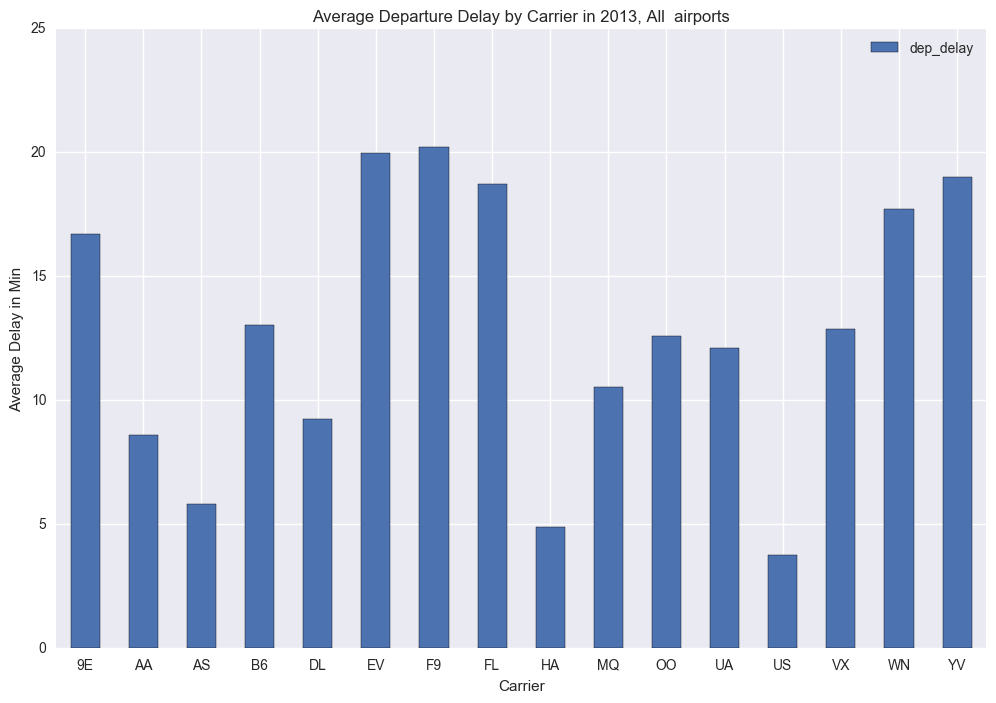

In [6]:
# Examine if specific carrier will create different delay impact
data = pd.read_csv('flight_data.csv')
data[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2013, All  airports')


data[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2013, All  airports')

# What were the worst and best airport with maximum number of delays in 2013 depending on arrival and departure?

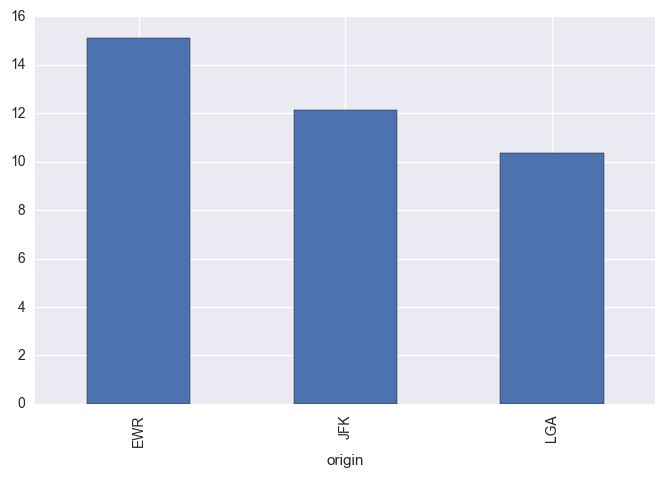

In [8]:
best_df=data[["origin","dep_delay","flight"]]
bestairport=best_df.groupby("origin").dep_delay.mean()
bestairport1=best_df.groupby("origin").flight.count()
bestairport
bestairport.plot.bar(figsize=(8,5))

LaGuardia Airport (LGA) was the best airport to travel in 2013 in terms of delays

# What were the most popular destination(Top 4) in 2013?

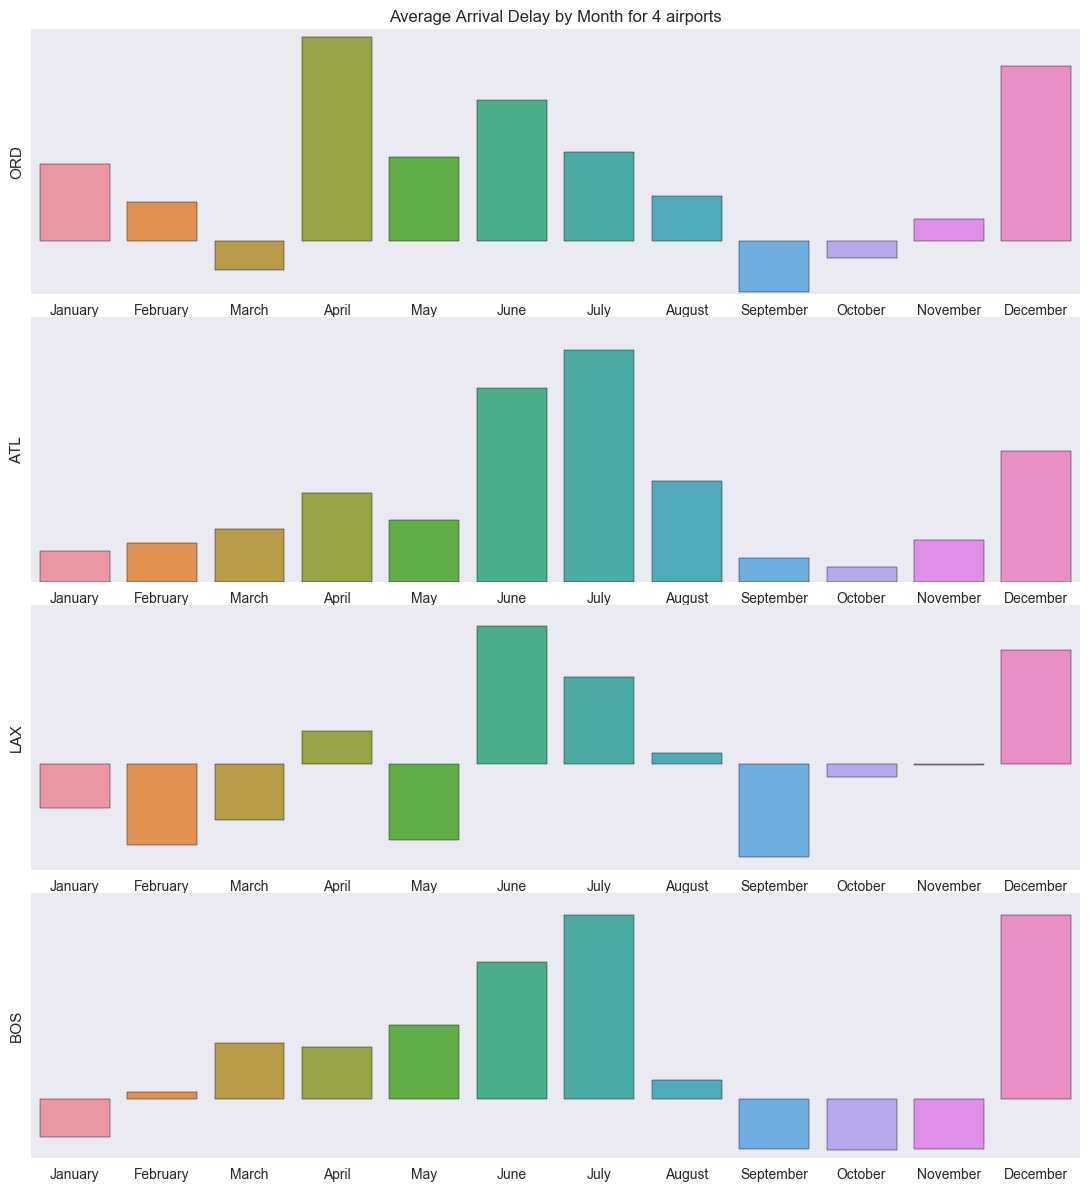

In [9]:
# Here we are considering the top 4 airports to which maximum no of flights flied
dataORD = data[(data['dest'] == 'ORD')]
dataATL = data[(data['dest'] == 'ATL')]
dataLAX = data[(data['dest'] == 'LAX')]
dataBOS = data[(data['dest'] == 'BOS')]
Months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
mon = np.arange(len(Months))

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11, 12))

sns.barplot(mon, dataORD[['month','arr_delay']].groupby('month').mean().reset_index().arr_delay, ax=ax1)
ax1.set_title('Average Arrival Delay by Month for 4 airports')
ax1.set_ylabel('ORD'); ax1.set_xlabel(''); 
sns.barplot(mon, dataATL[['month','arr_delay']].groupby('month').mean().reset_index().arr_delay, ax=ax2)
ax2.set_ylabel('ATL'); ax2.set_xlabel('')
sns.barplot(mon, dataLAX[['month','arr_delay']].groupby('month').mean().reset_index().arr_delay, ax=ax3)
ax3.set_ylabel('LAX'); ax3.set_xlabel('')
sns.barplot(mon, dataBOS[['month','arr_delay']].groupby('month').mean().reset_index().arr_delay, ax=ax4)
ax4.set_ylabel('BOS'); ax4.set_xlabel('')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[], xticklabels=Months)
plt.tight_layout(h_pad=0)


For arrival delays, we see 3 distinct peak months for ATL,LAX and BOS in months of June ,July December. The latter may be because of holiday travel. Delay is negligible or negative in the month of Sept,Oct and Nov. The peak delay is in April for ORD. In all locations, the end of year only has minimal delays in October and November, with delays rising back up in December. Next we would like to consider the impact of Hour of Day across the airports.

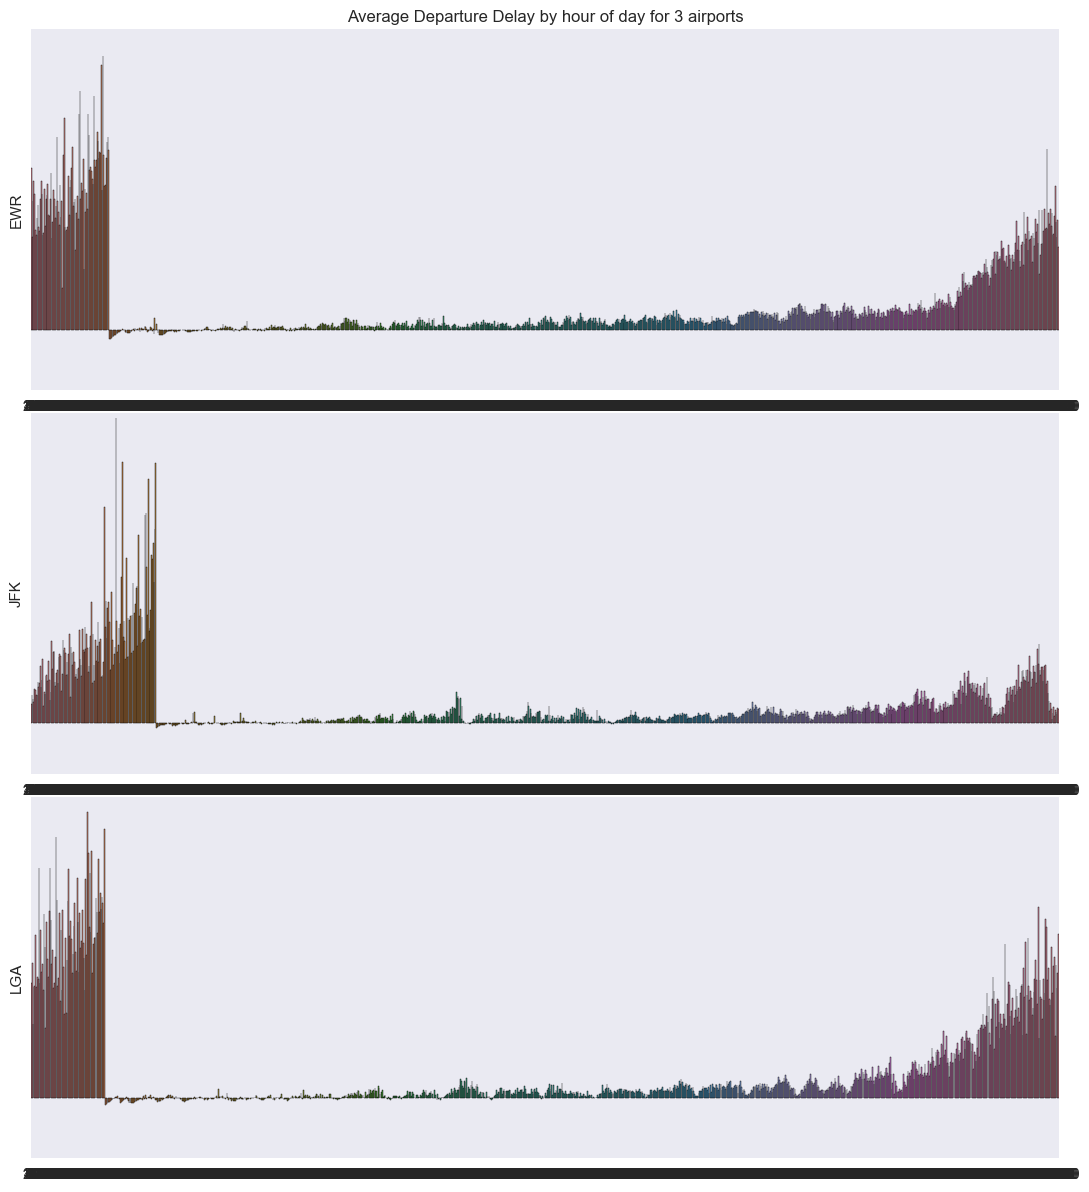

In [10]:
data['DepHr'] = data['dep_time']
data['ArrHr'] = data['arr_time']
dataEWR = data[(data['origin'] == 'EWR')]
dataJFK = data[(data['origin'] == 'JFK')]
dataLGA = data[(data['origin'] == 'LGA')]
EWR = dataEWR[['DepHr','dep_delay']].groupby('DepHr').mean().reset_index()
JFK = dataJFK[['DepHr','dep_delay']].groupby('DepHr').mean().reset_index()
LGA = dataLGA[['DepHr','dep_delay']].groupby('DepHr').mean().reset_index()
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(11, 12))

sns.barplot(EWR.DepHr, EWR.dep_delay,ax=ax1)
ax1.set_title('Average Departure Delay by hour of day for 3 airports')
ax1.set_ylabel('EWR'); ax1.set_xlabel(''); 
sns.barplot(JFK.DepHr, JFK.dep_delay,ax=ax2)
ax2.set_ylabel('JFK'); ax2.set_xlabel('')
sns.barplot(LGA.DepHr, LGA.dep_delay,ax=ax3)
ax3.set_ylabel('LGA'); ax3.set_xlabel('')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])#, xticklabels=Hours)
plt.tight_layout(h_pad=0)
plt.show()

# To find On time arrival % analysis for destination with maximum no of flights.

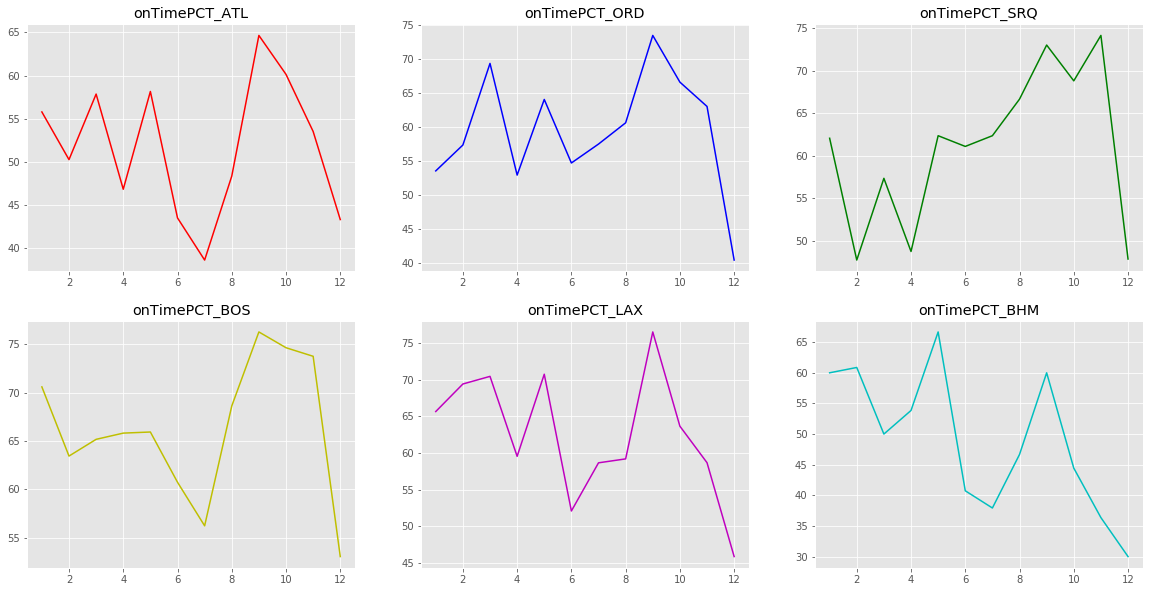

In [16]:
# On time arrival analysis

flight = pd.read_csv(your_local_path+'flight_data.csv')
ontime = flight[(flight['arr_delay'] == 0) | (flight['arr_delay'] < 0)]
ontime_dest = pd.pivot_table(ontime, values='arr_delay', index=['month'],columns=['dest'], aggfunc=np.size)
ontime_destna = ontime_dest.fillna(0)
total = pd.pivot_table(flight, values='arr_delay', index=['month'],columns=['dest'], aggfunc=np.size)
totaldp_na = total.fillna(0)
months = [1,2,3,4,5,6,7,8,9,10,11,12]
new = pd.DataFrame(index=months)
new['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
new['onTimePCT_ATL'] = (ontime_destna['ATL'] / totaldp_na['ATL']) *100
new.onTimePCT_ATL = round(new.onTimePCT_ATL,2)
new['onTimePCT_ORD'] = (ontime_destna['ORD'] / totaldp_na['ORD']) *100
new.onTimePCT_TPA = round(new.onTimePCT_ORD,2)
new['onTimePCT_SRQ'] = (ontime_destna['SRQ'] / totaldp_na['SRQ']) *100
new.onTimePCT_SRQ = round(new.onTimePCT_SRQ,2)
new['onTimePCT_BOS'] = (ontime_destna['BOS'] / totaldp_na['BOS']) *100
new.onTimePCT_ALB = round(new.onTimePCT_BOS,2)
new['onTimePCT_LAX'] = (ontime_destna['LAX'] / totaldp_na['LAX']) *100
new.onTimePCT_XNA = round(new.onTimePCT_LAX,2)
new['onTimePCT_BHM'] = (ontime_destna['BHM'] / totaldp_na['BHM']) *100
new.onTimePCT_BHM = round(new.onTimePCT_BHM,2)
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(2,3,1)
plt.title ('onTimePCT_ATL')
plt.plot(new.onTimePCT_ATL,'r')
plt.subplot(2,3,2)
plt.title ('onTimePCT_ORD')
plt.plot(new.onTimePCT_ORD, 'b')
plt.subplot(2,3,3)
plt.title ('onTimePCT_SRQ')
plt.plot(new.onTimePCT_SRQ, 'g')
plt.subplot(2,3,4)
plt.title ('onTimePCT_BOS')
plt.plot(new.onTimePCT_BOS,'y')
plt.subplot(2,3,5)
plt.title ('onTimePCT_LAX')
plt.plot(new.onTimePCT_LAX, 'm')
plt.subplot(2,3,6)
plt.title ('onTimePCT_BHM')
plt.plot(new.onTimePCT_BHM,'c')
plt.show()

# Which flights (i.e. carrier + flight + dest) happen every day and where did they flied too?

In [19]:
# Adding the Date column by concatenating yyyy-mm-dd
flight_data['date'] = flight_data['year'].astype(str) + "-" + flight_data['month'].astype(str) + "-" + flight_data['day'].astype(str)
# Creating a new dataframe with departure delay averages by date
avg_by_date = pd.DataFrame(flight_data.groupby('date').mean()) # Group by date for mean of all columns

# Assuming the degree of fastness corresponds to the speed of the flight. 
flight_data['speed_in_mph'] = flight_data.distance/(flight_data.air_time/60)
x = ['date','carrier','tailnum','flight','origin','dest','air_time','distance','speed_in_mph']
flight_data.sort_values('speed_in_mph',ascending = False)[x].head(1)

# Concatenating the flight details together as carrier + flight + dest for our analysis
flight_data['flight_combo'] = flight_data['carrier'].astype(str) + ' ' + flight_data['flight'].astype(str) + ' ' + flight_data['dest'].astype(str)
flight_data.head()

# Just checking the dates that are present in the dataset and getting a count
dates = pd.DataFrame(flight_data.date.unique())
dates.rename(columns={0:'date'}, inplace = True)
print ("\nFor a flight to fly every day, it needs to fly these number of days: ", dates.date.count())

# Grouping by flight and date to see which flights fly on which days of the year
flights_rep = flight_data.groupby(['flight_combo','date']).count()
flights_rep.reset_index(level=0, inplace=True) # getting rid of the flight_combo index from the dataframe
flights_rep.reset_index(level=0, inplace=True) # getting rid of the date index from the dataframe
flights_rep.columns.values[0]='count'

# Counting number of days a given flight combo flies
flights_rep = flights_rep.groupby('flight_combo').count().sort_values('count', ascending = False) 
flights_rep.reset_index(level=0, inplace=True)

# Getting only flights that fly on all days (365 unique days of the current dataset)
flights_all_days = flights_rep[flights_rep['count'] == 365]['flight_combo']
print ("\nThe flights (i.e. carrier + flight + dest) happen every day are: \n",flights_all_days)

# Getting the destinations they fly to
destinations = []
for f in flights_all_days.astype(str):
    destinations.append(f[len(f)-3:])
destinations = set(destinations)
print ("\nThe flights that fly every day fly to the following destinations: \n\n", destinations)


For a flight to fly every day, it needs to fly these number of days:  365

The flights (i.e. carrier + flight + dest) happen every day are: 
 0       UA 15 HNL
1      B6 371 FLL
2      AA 181 LAX
3      B6 219 CLT
4      AA 119 LAX
5      B6 703 SJU
6     DL 2391 TPA
7     AA 1357 SJU
8     EV 5712 IAD
9      VX 251 LAS
10    AA 1611 MIA
11     VX 413 LAX
12    DL 2159 MCO
13     B6 431 SRQ
14     VX 407 LAX
15      AA 59 SFO
16    B6 1783 MCO
17     B6 359 BUR
Name: flight_combo, dtype: object

The flights that fly every day fly to the following destinations: 

 {'SJU', 'LAX', 'FLL', 'LAS', 'BUR', 'TPA', 'HNL', 'MIA', 'SRQ', 'MCO', 'SFO', 'CLT', 'IAD'}


# How the carrier speeds varies with climatic conditions or seasonal patterns?

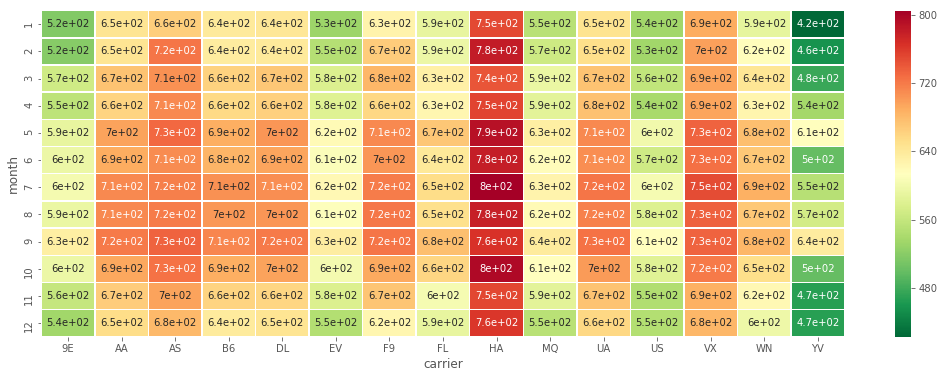

In [20]:
df1 = flight[flight['dep_delay'] > 0]
df2 = df1.drop(['year','day','dep_time','sched_dep_time','arr_time','sched_arr_time','time_hour'], axis=1)
df2['speed'] = df2.distance/df2.air_time*60*1.6
round(df2,2)
df2.speed = round(df2.speed,2)
speed1 = pd.pivot_table(df2, values='speed', index=['month'],columns=['carrier'], aggfunc=np.median)
round(speed1)
speed2 = speed1.drop('OO', 1)
round(speed2)
plt.figure(figsize = (18,6))
sns.heatmap(speed2, cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.show()

Based on above shown heatmap we can conclude these observations:
1. Flight speed start decreasing from Nov till April due to various climatic conditions ( Winter, snowfall etc)
2. Flight speed at peak point during summer (June to sept)
3. HA is best carrier to fly in term of lesser air time as speed is pretty high throughout the year.
4. YV is worst carrier in term of flight speed.